# Analysing Titanic Data Set

   We have analysed the famous titanic dataset and tried to predict the survival rate of passengers based on their Age, Gender, Pclass.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [104]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
sex={'male':0,
    'female':1}
data['Sex']=data['Sex'].map(sex)

In [106]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


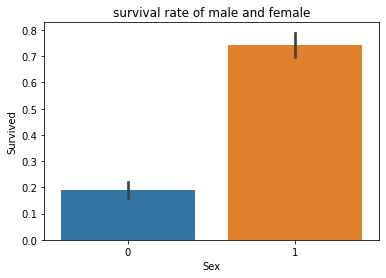

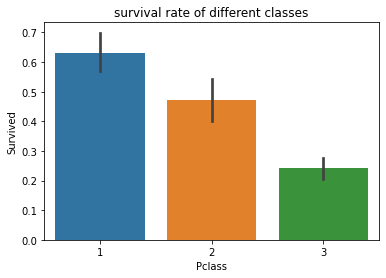

In [141]:
sns.barplot(x=data['Sex'], y=data['Survived'], data=data)
plt.title('survival rate of male and female')
plt.show()
sns.barplot(x=data['Pclass'], y=data['Survived'], data=data)
plt.title('survival rate of different classes')
plt.show()


From the above graphs 2 important conclusions can be drawn:

   The survival rate of men was higher than that of women                                                                                                                        
   The survival rate of 3rd class passenger was below 25% where the survival rate of upper class was more than 60%
   

In [119]:
X=data.iloc[:,[2, 4, 5]]
y=data.iloc[:, 1]

In [121]:
mean_age=data['Age'].mean()
mean_age

29.69911764705882

In [122]:
X=X.fillna(mean_age)

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0 )

In [125]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [133]:
y_pred=clf.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7574626865671642